In [1]:
import os

# **DATASET PREPARATION**

In [2]:
!pip install wfdb

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.



  Obtaining dependency information for numpy>=1.10.1 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3


In [3]:
import wfdb

In [4]:
db= wfdb.get_dbs()
display(db)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['actes-cycloergometer-exercise',
  'Cardiorespiratory measurement from graded cycloergometer exercise testing'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['ann-pt-summ',
  'Medical Expert Annotations of Unsupported Facts in Doctor-Written and LLM-Generated Patient Summaries'],
 ['annotation-dataset-sdoh',
  'Annotation dataset of social determinants of health from MIMIC-III Clinical Care Database'],
 ['annotation-dataset-sdoh',
  'Annotation dataset of social determinants of health from MIMIC-III Clinical Care Database'],
 ['annotation-opioid-use-notes',
  'Annotation dataset of problematic opioid u

In [5]:
afdb_dir = os.path.join(os.getcwd(), 'afdb_dir')
wfdb.dl_database('afdb', dl_dir=afdb_dir)


Generating record list for: 00735
Generating record list for: 03665
Generating record list for: 04015
Generating record list for: 04043
Generating record list for: 04048
Generating record list for: 04126
Generating record list for: 04746
Generating record list for: 04908
Generating record list for: 04936
Generating record list for: 05091
Generating record list for: 05121
Generating record list for: 05261
Generating record list for: 06426
Generating record list for: 06453
Generating record list for: 06995
Generating record list for: 07162
Generating record list for: 07859
Generating record list for: 07879
Generating record list for: 07910
Generating record list for: 08215
Generating record list for: 08219
Generating record list for: 08378
Generating record list for: 08405
Generating record list for: 08434
Generating record list for: 08455
Generating list of all files for: 00735
Generating list of all files for: 03665
Generating list of all files for: 04015
Generating list of all files f

In [6]:
# Display the  downloaded content
afdb_in_files = [os.path.splitext(f)[0] for f in os.listdir(afdb_dir) if f.endswith('.dat')]
print(afdb_in_files)

['04015', '04043', '04048', '04126', '04746', '04908', '04936', '05091', '05121', '05261', '06426', '06453', '06995', '07162', '07859', '07879', '07910', '08215', '08219', '08378', '08405', '08434', '08455']


In [7]:
import numpy as np
time_window = 48
all_beats = []
all_annotations = []
for in_file in afdb_in_files:
    print('...processing...' + in_file + '...file')
    signal, fields = wfdb.rdsamp(os.path.join(afdb_dir,in_file), channels=[0])
    annotations = wfdb.rdann(os.path.join(afdb_dir,in_file), 'atr')
    signal=np.array(signal).flatten()
    # grab subsequent heartbeats within [position-64,position+64] window
    beats = np.zeros((len(annotations.sample),time_window*2))
    # note that we remove first and last beats to ensure that all beats have equal lengths
    for i, ann_position in enumerate(annotations.sample[5:-5]):
        beats[i] = signal[ann_position-time_window:ann_position+time_window]
    all_beats.append(beats)
    # consequently, we remove few first and last annotations
    all_annotations.append(annotations.aux_note)

all_beats = np.concatenate(all_beats)
all_annotations = np.concatenate(all_annotations)


...processing...04015...file
...processing...04043...file
...processing...04048...file
...processing...04126...file
...processing...04746...file
...processing...04908...file
...processing...04936...file
...processing...05091...file
...processing...05121...file
...processing...05261...file
...processing...06426...file
...processing...06453...file
...processing...06995...file
...processing...07162...file
...processing...07859...file
...processing...07879...file
...processing...07910...file
...processing...08215...file
...processing...08219...file
...processing...08378...file
...processing...08405...file
...processing...08434...file
...processing...08455...file


In [8]:
print(all_beats.shape)
print(all_annotations.shape)

(605, 96)
(605,)


In [9]:
print(all_annotations)

['(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N'
 '(AFIB' '(N' '(AFIB' '(N' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N'
 '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB'
 '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N'
 '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB'
 '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N'
 '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB'
 '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N'
 '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB'
 '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N'
 '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB'
 '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N'
 '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB'
 '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(AFL' '(N' '(AFIB'

In [10]:
from collections import Counter

counts = Counter(label.strip('()') for label in all_annotations)
print(counts)

Counter({'AFIB': 291, 'N': 288, 'AFL': 14, 'J': 12})


In [12]:
# Remove AFL and J's
valid_labels = {'AFIB', 'N'}
valid_indices = [i for i, label in enumerate(all_annotations) if label.strip('()') in valid_labels]


filtered_beats = all_beats[valid_indices]
filtered_annotations = np.array([all_annotations[i] for i in valid_indices])


print(filtered_beats.shape)
print(filtered_annotations.shape)
print(Counter(label.strip('()') for label in filtered_annotations))

(579, 96)
(579,)
Counter({'AFIB': 291, 'N': 288})


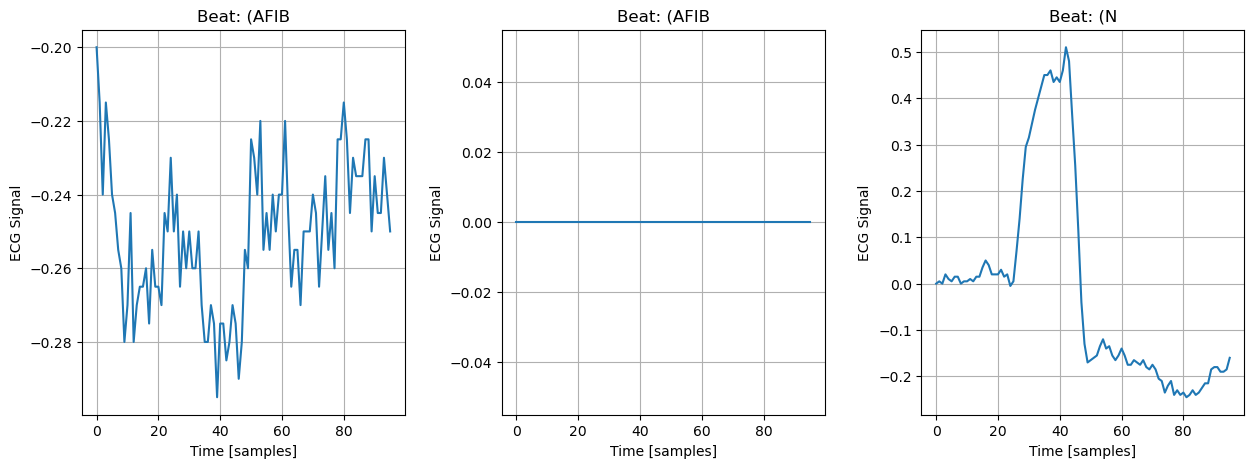

In [13]:
import matplotlib.pyplot as plt

sample_numbers = [100, 232, 529]

# 1x4 grid oluştur (4 görüntü için)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)

for i, sn in enumerate(sample_numbers):
    axes[i].plot(filtered_beats[sn])
    axes[i].set(xlabel='Time [samples]', ylabel='ECG Signal', title=f'Beat: {filtered_annotations[sn]}')
    axes[i].grid()

plt.show()

In [14]:
pip install pyWavelets

Note: you may need to restart the kernel to use updated packages.


c:\Users\Kimia\anaconda3\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


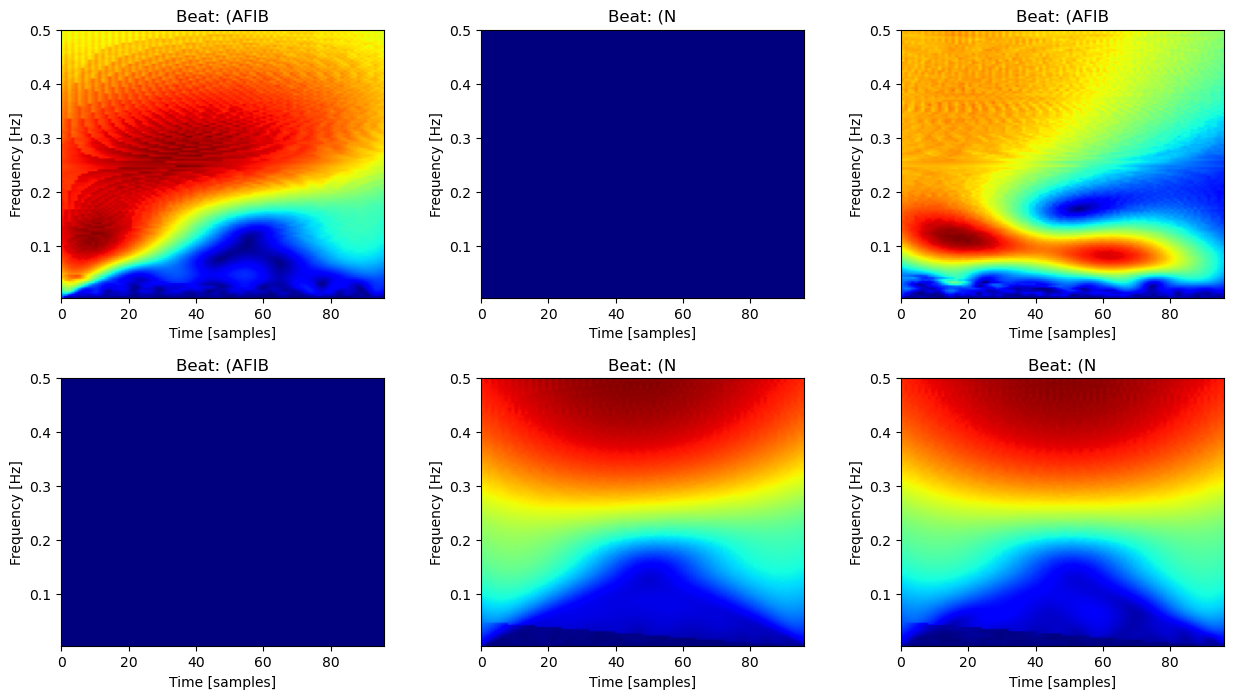

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets kütüphanesi
import random

# Dalgacık dönüşüm fonksiyonu (scalogram)
def plot_scalogram(signal, ax, title):
    # Morlet dalgacığı ve ölçek seçimi
    wavelet = 'cmor'  # Morlet dalgacığı
    scales = np.arange(1, 128)  # Ölçek aralığı (bu değeri deneyerek ayarlayabilirsiniz)

    # Sürekli dalgacık dönüşümü (CWT)
    coefficients, freqs = pywt.cwt(signal, scales, wavelet)

    # Scalogramı çizme
    ax.imshow(np.abs(coefficients), aspect='auto', cmap='jet', origin='lower', extent=[0, len(signal), freqs.min(), freqs.max()])
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [samples]')
    ax.set_title(title)
    ax.grid(False)

# Rasgele 6 beat seç
random_samples = random.sample(range(len(filtered_beats)), 6)

# 2x3 grid oluştur
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i, sample in enumerate(random_samples):
    row = i // 3  # satır
    col = i % 3   # sütun
    signal = all_beats[sample]
    title = f'Beat: {filtered_annotations[sample]}'
    plot_scalogram(signal, axes[row, col], title)

plt.show()

# **DATA PREPROCESSING**

> Blok alıntı ekle



In [ ]:
!pip install tensorflow

In [ ]:
# Update TensorFlow and NumPy to the latest version
!pip install --upgrade tensorflow numpy


In [ ]:
!pip install --upgrade tensorflow keras

In [ ]:
# Uninstall and reinstall NumPy
!pip uninstall -y numpy



In [ ]:
!pip install numpy

In [ ]:
pip install --upgrade tensorflow

c:\Users\Kimia\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 94, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 45, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 20, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451,457 (1.72 MB)

 Trainable params: 451,457 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5223 - loss: 0.6987 - val_accuracy: 0.5345 - val_loss: 0.6746
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5704 - loss: 0.6806 - val_accuracy: 0.7414 - val_loss: 0.6552
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6905 - loss: 0.6665 - val_accuracy: 0.6379 - val_loss: 0.6331
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6653 - loss: 0.6959 - val_accuracy: 0.7414 - val_loss: 0.6050
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7006 - loss: 0.6284 - val_accuracy: 0.7414 - val_loss: 0.5613
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7338 - loss: 0.5594 - val_accuracy: 0.7500 - val_loss: 0.5402
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7232 - loss: 0.5453 - val_accuracy: 0.7155 - val_loss: 0.5763
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7314 - loss: 0.5435 - val_accuracy: 0.7328 - v

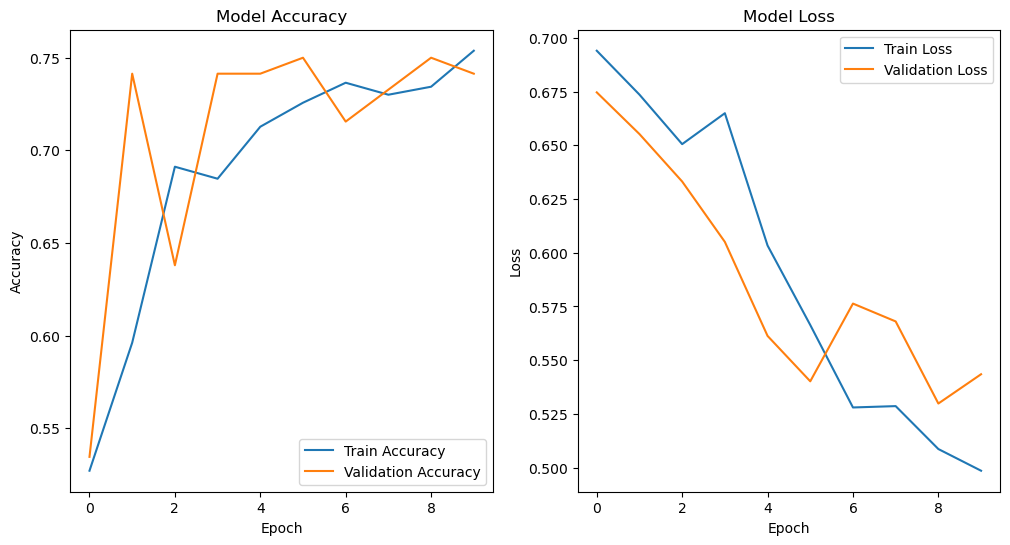

In [16]:

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Binary label '0' and '1'
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(filtered_annotations)  # AFIB -> 1, N -> 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(filtered_beats, encoded_labels, test_size=0.2, random_state=42)

# Veriyi 2D formatta CNN'e uygun hale getir (num_samples, time_steps, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# CNN Modeli oluşturma
model = models.Sequential()

# 1. Konvolüsyonel Katman
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))

# 2. Konvolüsyonel Katman
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# 3. Konvolüsyonel Katman
model.add(layers.Conv1D(256, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Düzleştirme (Flatten) katmanı
model.add(layers.Flatten())

# Tam Bağlantı (Fully Connected) Katmanı
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Aşırı öğrenmeyi engellemek için Dropout

# Çıkış Katmanı
model.add(layers.Dense(1, activation='sigmoid'))  # 0 veya 1 olarak sınıflandırma

# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modelin özetini yazdırma
model.summary()

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Eğitim sürecinde elde edilen doğruluk ve kaybı görselleştirme
import matplotlib.pyplot as plt

# Eğitim doğruluğu ve kaybı
plt.figure(figsize=(12, 6))

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Verileri hazırla
X = filtered_beats.reshape(-1, 96, 1, 1)  # AlexNet'in giriş formatına uygun hale getirme
X = tf.image.resize(X, [227, 227])        # AlexNet için giriş boyutu 227x227
X = X.numpy()

# Etiketleri 0 ve 1 olarak dönüştür
labels = [0 if label.strip('()') == 'N' else 1 for label in filtered_annotations]
y = to_categorical(labels, num_classes=2)

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# AlexNet modelini oluştur
model = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(227, 227, 1)),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    BatchNormalization(),

    Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    BatchNormalization(),

    Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    BatchNormalization(),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Modeli derle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Test verisinde doğruluk
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

c:\Users\Kimia\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.5502 - loss: 13.8377 - val_accuracy: 0.5699 - val_loss: 20.5858
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5083 - loss: 14.2600 - val_accuracy: 0.5591 - val_loss: 14.6030
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5395 - loss: 6.0304 - val_accuracy: 0.5699 - val_loss: 2.2707
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5516 - loss: 2.5105 - val_accuracy: 0.7097 - val_loss: 1.0345
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5842 - loss: 1.7657 - val_accuracy: 0.5806 - val_loss: 0.6198
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5910 - loss: 1.0693 - val_accuracy: 0.7312 - val_loss: 0.5805
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5680 - loss: 1.1219 - val_accuracy: 0.7419 - val_loss: 0.5706
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5804 - loss: 0.9562 - val_accuracy: 0.6667 - val_l

In [20]:
#should look in to the code and run it carefully 